# Laboratorul 8

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercițiul 1

Care este **frecvența de eșantionare** a semnalului de trafic? (revedeți secțiunea pentru detalii despre cum a fost achiziționat acesta)

In [3]:
#Frecventa de esantionare este de 1 esantion pe ora
#Adica fs = 1/3600 Hz
fs = 1/3600  # Hz
print("Frecventa de esantionare fs =", fs, "Hz")

Frecventa de esantionare fs = 0.0002777777777777778 Hz


## Exercițiul 2

Ce **interval de timp** acoperă eșantioanele din fișier?

In [28]:
x = np.genfromtxt('assets/Train.csv', delimiter=',', skip_header=1)
N = x.shape[0]
total_hours = (N - 1)

print("Numar esantioane =", N)
print("Intervalul total acoperit =", total_hours, "ore")
print("Intervalul total acoperit(zile) =", total_hours / 24, "zile")


Numar esantioane = 18288
Intervalul total acoperit = 18287 ore
Intervalul total acoperit(zile) = 761.9583333333334 zile


## Exercițiul 3

Presupunând că semnalul a fost eșantionat **corect** (fără aliere) și **optim**, care este **frecvența maximă** prezentă în semnal?

In [29]:
#Din teorema lui Nyquist
# fs >= 2*f_max

# Frecventa de esantionare (1 esantion pe ora)
fs = 1 / 3600  # Hz
f_max = fs / 2  # Hz, frecventa maxima

print("Frecventa de esantionare fs =", fs, "Hz")
print("Frecventa maxima reprezentabila f_max =", f_max, "Hz")

Frecventa de esantionare fs = 0.0002777777777777778 Hz
Frecventa maxima reprezentabila f_max = 0.0001388888888888889 Hz


## Exercițiul 4

Utilizați funcția `np.fft.rfft(x)` pentru a calcula **transformata Fourier** a semnalului și afișați grafic **modulul transformatei**.

Deoarece valorile pe care le veți calcula sunt în Hz, este important să definiți corect frecvența de eșantionare (astfel încât valorile de frecvențe pe care le obțineți utilizând ultima secvență de cod din ghidul Python din îndrumar să aibă o interpretare corectă din punct de vedere fizic).

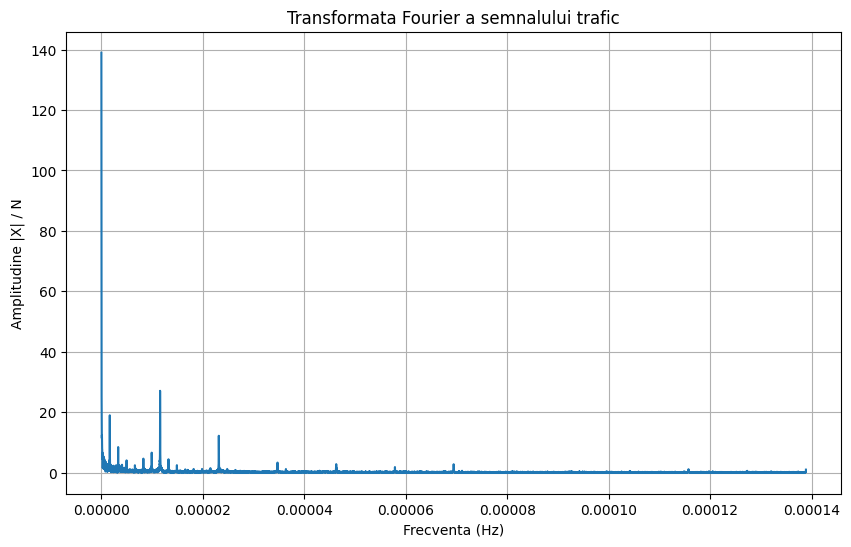

In [ ]:
traffic = x[:, 2]

X = np.fft.rfft(traffic)

X_magnitude = np.abs(X / N)

f = fs * np.linspace(0, N//2, N//2 + 1) /N


plt.figure(figsize=(10,6))
plt.plot(f, X_magnitude)
plt.title("Transformata Fourier a semnalului trafic")
plt.xlabel("Frecventa (Hz)")
plt.ylabel("Amplitudine")
plt.grid(True)
plt.show()

## Exercițiul 5

Prezintă acest semnal o **componentă continuă**? Dacă da, eliminați-o și afișați semnalul rezultat. Dacă nu, specificați cum ați determinat acest fapt.

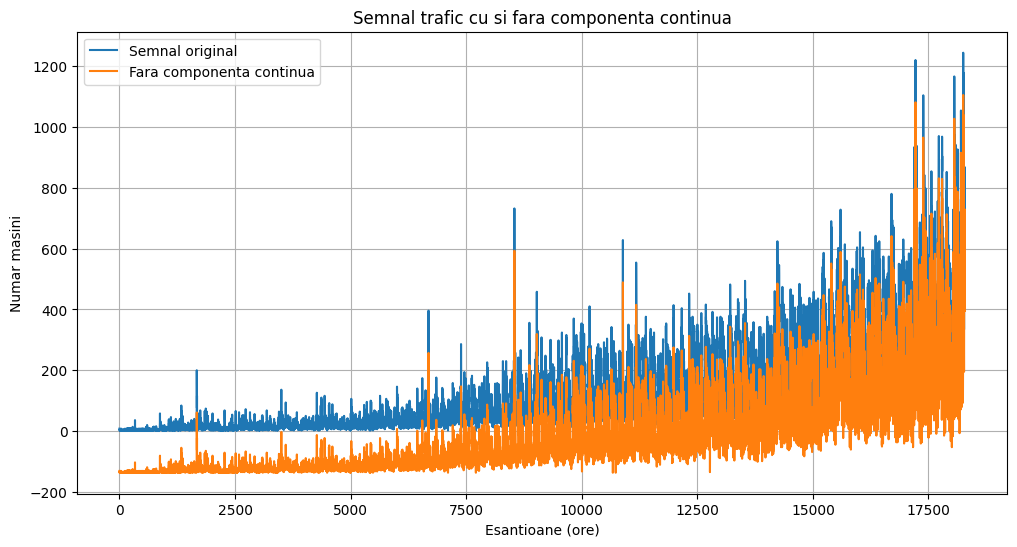

In [32]:
# Eliminam componenta continua
traffic_no_dc = traffic - np.mean(traffic)

# Plot comparativ semnal original vs fara componenta continua
plt.figure(figsize=(12,6))
plt.plot(traffic, label="Semnal original")
plt.plot(traffic_no_dc, label="Fara componenta continua")
plt.title("Semnal trafic cu si fara componenta continua")
plt.xlabel("Esantioane (ore)")
plt.ylabel("Numar masini")
plt.legend()
plt.grid(True)
plt.show()


## Exercițiul 6

Care sunt frecvențele principale conținute în semnal, așa cum apar ele în transformata Fourier? Mai exact, determinați **primele 4 cele mai mari valori** ale modulului transformatei și specificați căror frecvențe (în Hz) le corespund. Căror fenomene periodice din semnal se asociază fiecare?

In [34]:
# Top 4 frecvente
top_indices = np.argsort(X_magnitude)[-4:][::-1]

# Afisare frecvente si amplitudini
for i, idx in enumerate(top_indices):
    print(f"{i+1}. Frecventa: {f[idx]:.6f} Hz cu amplitudinea {X_magnitude[idx]:.2f}")

1. Frecventa: 0.000000 Hz cu amplitudinea 138.96
2. Frecventa: 0.000000 Hz cu amplitudinea 66.85
3. Frecventa: 0.000000 Hz cu amplitudinea 35.22
4. Frecventa: 0.000012 Hz cu amplitudinea 27.10


## Exercițiul 7

Începând de la un eșantion ales de voi (după cel al 1000-lea), reprezentați, pe un grafic separat, **o lună de trafic**. Alegeți eșantionul de start astfel încât reprezentarea să înceapă într-o **zi de luni**.

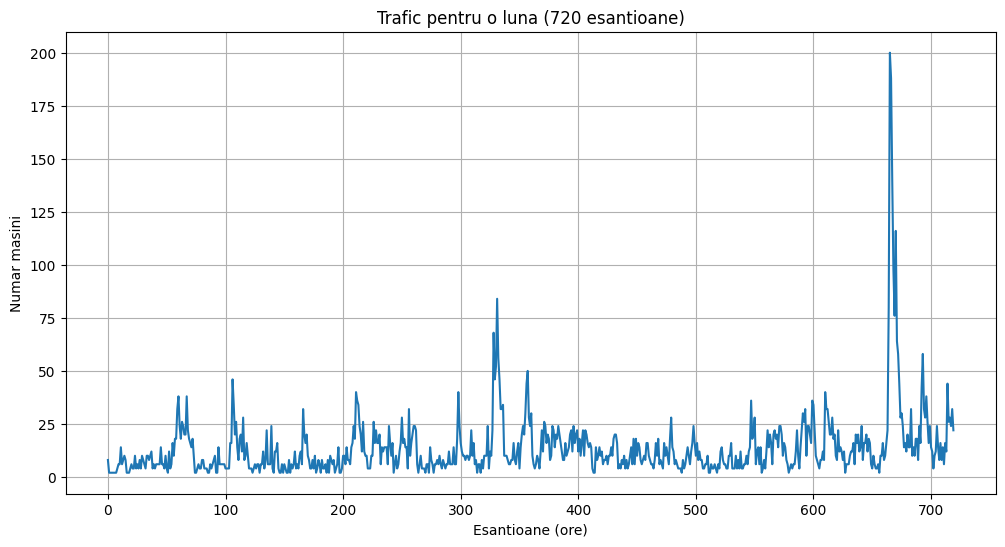

In [36]:
# Numar de ore intr-o luna
hours_in_month = 30 * 24  # 720 de esantioane

start_index = 1008

# Selectam semnalul pentru o luna
traffic_month = traffic[start_index:start_index + hours_in_month]

# Plot
plt.figure(figsize=(12,6))
plt.plot(traffic_month)
plt.title("Trafic pentru o luna (720 esantioane)")
plt.xlabel("Esantioane (ore)")
plt.ylabel("Numar masini")
plt.grid(True)
plt.show()


## Exercițiul 8

Nu se cunoaște data la care a început măsurarea acestui semnal. Concepeți o **metodă** (descrieți în cuvinte) prin care să determinați, doar analizând semnalul în timp, această dată. Comentați ce neajunsuri ar putea avea soluția propusă și care sunt factorii de care depinde acuratețea ei.

In [ ]:
# Determinam numarul de esantioane pe zi (24 ore)
# Calculam numarul total de zile complete in semnal
# Reshape la semnal pentru a avea cate o zi pe rand si calculam media zilnica
# Afisam graficul mediei zilnice pentru a vizualiza evolutia traficului
# Extragem primele doua saptamani pentru analiza tiparului initial
# Calculam media traficului pentru fiecare zi a saptamanii din primele doua saptamani
# Afisam tiparul detectat pentru a observa diferentele dintre zile lucratoare si weekend

# Limitari: zgomotul sau evenimentele speciale pot strica tiparele, 
# unele zile lucratoare pot arata ca weekend, metoda ofera doar o estimare aproximativa
